In [1]:
import pandas as pd

# Path to the Excel file
excel_file_path = '/home/kumaripinki/Homestays_Data.xlsx'

# Load the Excel file into a DataFrame
data = pd.read_excel(excel_file_path)

# Specify the path where the CSV file should be saved
csv_file_path = '/home/kumaripinki/Homestays_Data.csv'

# Save the DataFrame to a CSV file
data.to_csv(csv_file_path, index=False)


In [2]:
# Data cleaning

import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('/home/kumaripinki/Homestays_Data.csv')

# Check for null values and fill or drop them
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['beds'].fillna(data['beds'].median(), inplace=True)
data['review_scores_rating'].fillna(data['review_scores_rating'].mean(), inplace=True)
data.dropna(subset=['thumbnail_url'], inplace=True)  # Assuming thumbnail URL is crucial


In [3]:
# 2. Feature Engineering
from datetime import datetime

# Assuming 'host_since' is a column in your dataset representing when the host started
data['Host_Tenure'] = (pd.to_datetime('today') - pd.to_datetime(data['host_since'])).dt.days // 365
data['Amenities_Count'] = data['amenities'].apply(lambda x: len(x.split(',')))



In [4]:
# 3. One-Hot Encoding
data = pd.get_dummies(data, columns=['property_type', 'room_type', 'cancellation_policy', 'bed_type'])


In [5]:
# 4. Text Processing
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
amenities_tfidf = tfidf.fit_transform(data['amenities']).toarray()
amenities_df = pd.DataFrame(amenities_tfidf, columns=tfidf.get_feature_names_out())
data = pd.concat([data, amenities_df], axis=1)
data.drop('amenities', axis=1, inplace=True)


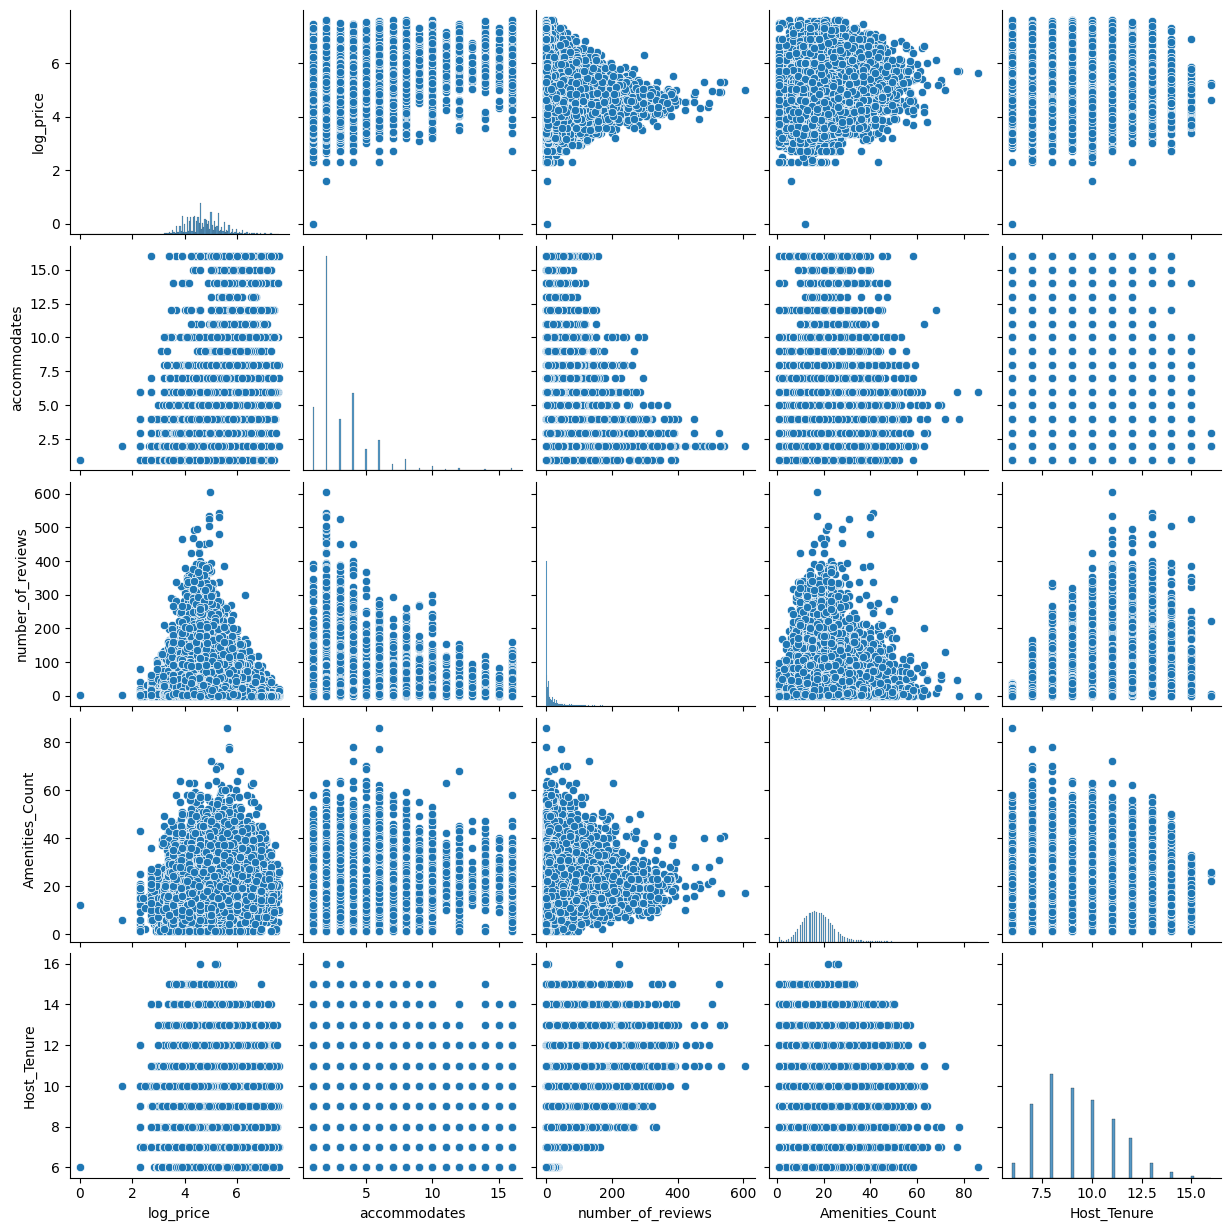

In [34]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['log_price', 'accommodates', 'number_of_reviews', 'Amenities_Count', 'Host_Tenure']])
plt.show()

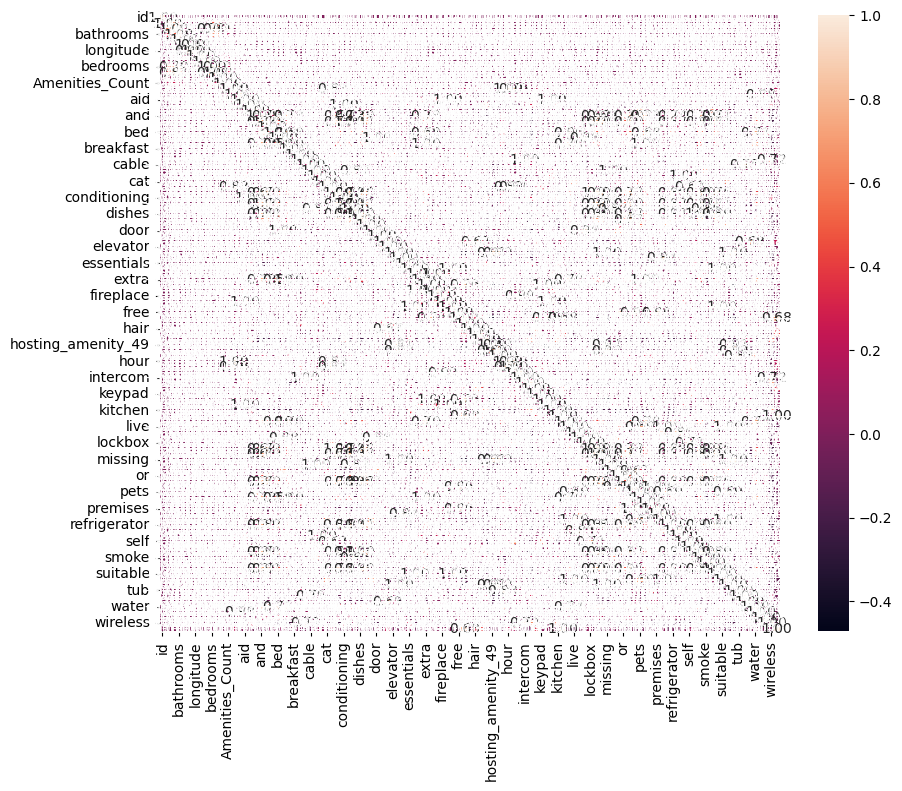

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


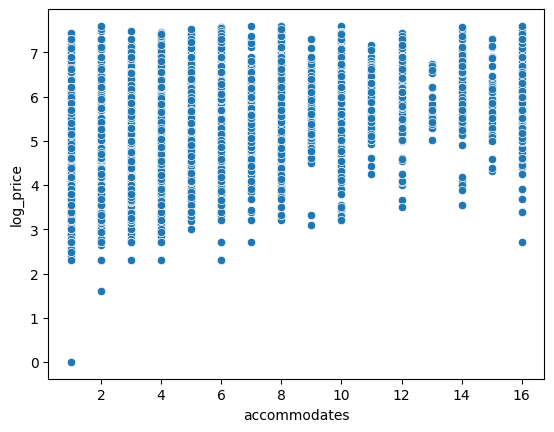

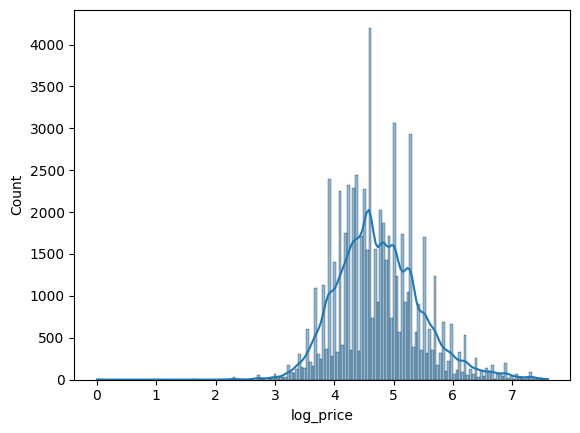

In [11]:
# Scatter plot
sns.scatterplot(x=data['accommodates'], y=data['log_price'])
plt.show()

# Histogram
sns.histplot(data['log_price'], kde=True)
plt.show()

In [10]:
# # Convert categorical columns using one-hot encoding
# encoded_data = pd.get_dummies(data)

# # Calculate the correlation matrix on the encoded dataset
# correlation_matrix_encoded = encoded_data.corr()

# # Plotting the correlation matrix of the encoded data
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix_encoded, annot=True, fmt=".2f")
# plt.show()


MemoryError: Unable to allocate 112. GiB for an array with shape (204832, 73211) and data type float64

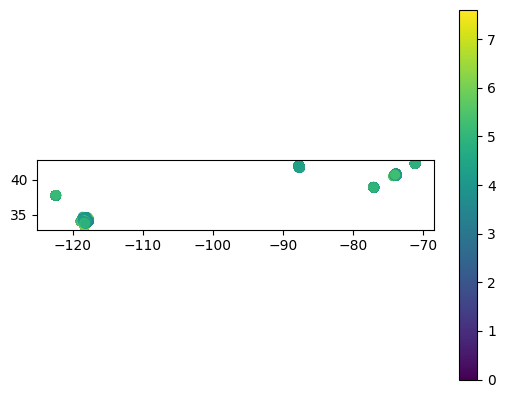

In [16]:
# 3. Geospatial Analysis
import geopandas as gpd
from shapely.geometry import Point

# Assuming 'data' has correct data types for latitude and longitude
data['coordinates'] = data.apply(lambda row: Point(float(row['longitude']), float(row['latitude'])), axis=1)
geo_data = gpd.GeoDataFrame(data, geometry='coordinates')

# Plotting
geo_data.plot(column='log_price', legend=True, cmap='viridis')  # Adding a color map for better visualization
plt.show()

In [6]:
# 4. Sentiment Analysis on Textual Data
from textblob import TextBlob
# Ensure that 'description' is a string and handle NaNs
data['description'] = data['description'].fillna('No description').astype(str)

# Calculate sentiment polarity
data['description_sentiment'] = data['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the output
print(data[['description', 'description_sentiment']].head())


                                         description  description_sentiment
0  Beautiful, sunlit brownstone 1-bedroom in the ...               0.716667
1  Enjoy travelling during your stay in Manhattan...               0.250000
2  The Oasis comes complete with a full backyard ...               0.274085
3  This light-filled home-away-from-home is super...               0.281515
5  Beautiful private room overlooking scenic view...               0.292143


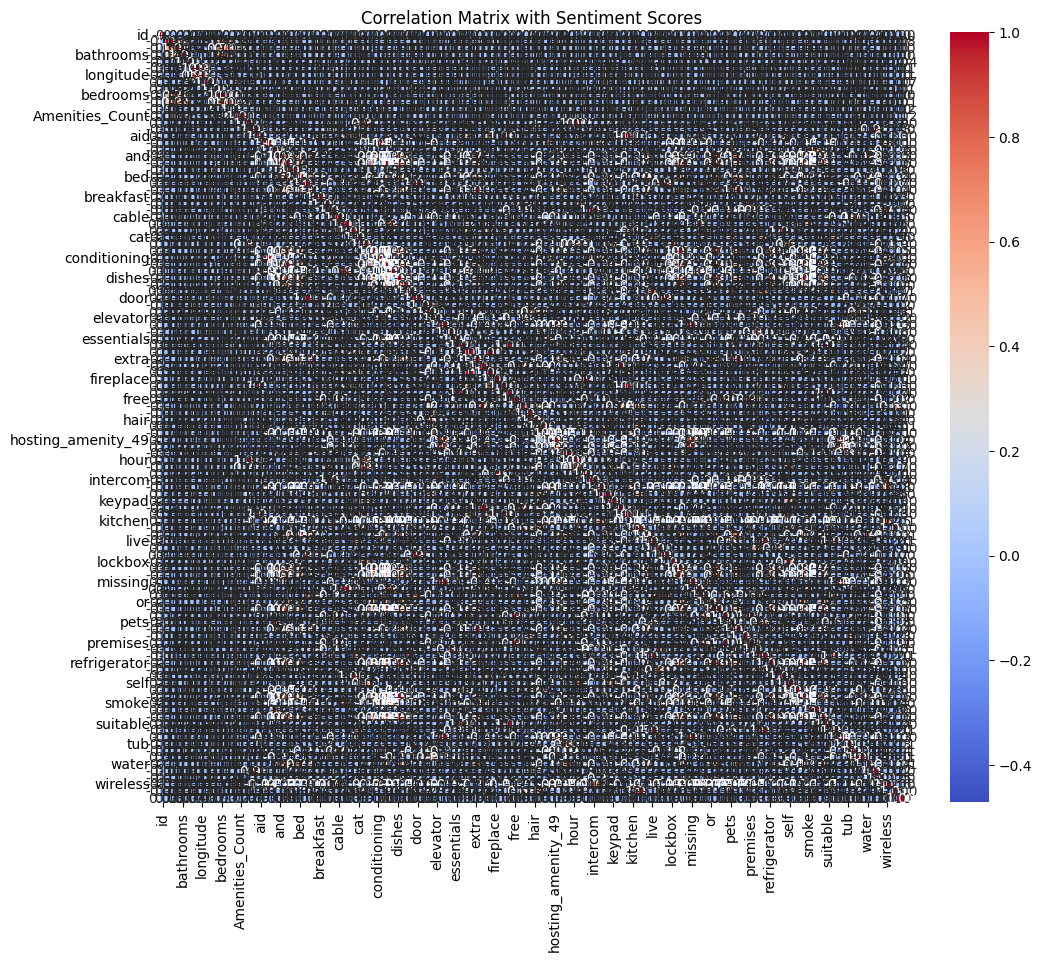

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap including sentiment
numeric_data = data.select_dtypes(include=[np.number])  # ensure it includes description_sentiment
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Sentiment Scores')
plt.show()


In [8]:
from datetime import datetime

# Convert date columns to the number of days from today
date_columns = ['first_review', 'last_review', 'host_since']
reference_date = datetime.now()

for col in date_columns:
    data[col] = pd.to_datetime(data[col])
    data[col] = (reference_date - data[col]).dt.days


In [9]:
# Drop textual columns that are hard to encode or are not useful
data.drop(['description', 'name'], axis=1, inplace=True)


In [10]:
# Ensure 'city' and any other leftover categorical columns are encoded
if 'city' in data.columns:
    data = pd.get_dummies(data, columns=['city'])

# Ensure all data is numeric now
non_numeric_columns = data.select_dtypes(include=['object']).columns
if not non_numeric_columns.empty:
    print("Warning: There are still non-numeric columns:", non_numeric_columns)
else:
    print("All columns are now numeric, ready for model training.")


       'instant_bookable', 'neighbourhood', 'thumbnail_url', 'zipcode',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Casa particular',
       'property_type_Castle', 'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Lighthouse',
       'property_type_Loft', 'property_type_Other',
       'property_type_Parking Space', 'property_type_Serviced apartment',
       'property_type_Tent', 'property_type_Timeshare', 'property_type_Tipi',
       'property_type_Townhouse', 'property_type_Train',
       'property_type_T

In [11]:
bool_cols = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in bool_cols:
    data[col] = data[col].astype('category').cat.codes  # Convert 't'/'f' and similar to 0/1


In [12]:
# Check for NaN values in the specified columns
property_room_cols = data.columns[data.columns.str.startswith('property_type_') | data.columns.str.startswith('room_type_')]
nan_columns = data[property_room_cols].columns[data[property_room_cols].isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['property_type_Apartment', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Casa particular', 'property_type_Castle', 'property_type_Cave', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Earth House', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Hut', 'property_type_In-law', 'property_type_Island', 'property_type_Lighthouse', 'property_type_Loft', 'property_type_Other', 'property_type_Parking Space', 'property_type_Serviced apartment', 'property_type_Tent', 'property_type_Timeshare', 'property_type_Tipi', 'property_type_Townhouse', 'property_type_Train', 'property_type_Treehouse', 'property_type_Vacation home', 'property_type_Villa', 'property_type_Yurt', 'room_type_Entire home/apt', 'room_type_Private room', 'room_typ

In [13]:
# Replace NaN values with 0 in these columns
data[property_room_cols] = data[property_room_cols].fillna(0).astype(int)


In [14]:
# This should now work without raising an error
data[property_room_cols] = data[property_room_cols].astype(int)

# Final check to ensure all data is now numeric
non_numeric_columns = data.select_dtypes(include=['object']).columns
if not non_numeric_columns.empty:
    print("Warning: There are still non-numeric columns:", non_numeric_columns)
else:
    print("All columns are now numeric, ready for model training.")


       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed'],
      dtype='object')


In [15]:
# If cancellation policies and bed types are not yet encoded or are object type
cancellation_cols = ['cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60']
bed_type_cols = ['bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed']

# Convert these columns to integer type
data[cancellation_cols + bed_type_cols] = data[cancellation_cols + bed_type_cols].fillna(0).astype(int)


In [16]:
# Assuming 'coordinates' are Shapely Points; safely extract lat and long
if 'coordinates' in data.columns:
    data['latitude'] = data['coordinates'].apply(lambda p: p.y if p and not p.is_empty else np.nan)
    data['longitude'] = data['coordinates'].apply(lambda p: p.x if p and not p.is_empty else np.nan)
    data.drop('coordinates', axis=1, inplace=True)

# Verify extraction
print(data[['latitude', 'longitude']].head())


    latitude   longitude
0  40.696524  -73.991617
1  40.766115  -73.989040
2  40.808110  -73.943756
3  37.772004 -122.431619
5  37.753164 -122.429526


In [17]:
# Convert 'thumbnail_url' to a binary indicator (1 if URL is present, 0 otherwise)
data['has_thumbnail'] = data['thumbnail_url'].notna().astype(int)
data.drop('thumbnail_url', axis=1, inplace=True)


In [23]:
# Check if all columns are now numeric
non_numeric_columns = data.select_dtypes(include=['object']).columns
if not non_numeric_columns.empty:
    print("Warning: There are still non-numeric columns:", non_numeric_columns)
else:
    print("All columns are now numeric, ready for model training.")


In [24]:
# Import necessary library
import pandas as pd

# Drop the original 'zipcode' column if it's no longer needed after one-hot encoding
data = data.drop('zipcode', axis=1)

# Perform one-hot encoding on the remaining non-numeric column
data_encoded = pd.get_dummies(data, columns=['neighbourhood'])

# Check the transformation
print("Transformation complete. Shape of data:", data_encoded.shape)


Transformation complete. Shape of data: (73211, 794)


In [25]:
# 6. Data Preparation

from sklearn.model_selection import train_test_split

X = data.drop('log_price', axis=1)
y = data['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Check data types in X_train
print(X_train.dtypes)


id               float64
accommodates     float64
bathrooms        float64
cleaning_fee        int8
first_review     float64
                  ...   
city_DC             bool
city_LA             bool
city_NYC            bool
city_SF             bool
has_thumbnail      int64
Length: 176, dtype: object


In [27]:
# Redefine X and y using the one-hot encoded data
X_encoded = data_encoded.drop('log_price', axis=1)
y_encoded = data_encoded['log_price']

# Split the data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# Check data types in X_train_encoded
print(X_train_encoded.dtypes)


id                            float64
accommodates                  float64
bathrooms                     float64
cleaning_fee                     int8
first_review                  float64
                               ...   
neighbourhood_Woodlawn           bool
neighbourhood_Woodley Park       bool
neighbourhood_Woodridge          bool
neighbourhood_Woodside           bool
neighbourhood_Wrigleyville       bool
Length: 793, dtype: object


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [30]:
# Drop rows where the target variable 'log_price' is NaN
data_encoded_clean = data_encoded.dropna(subset=['log_price'])

# Redefine X and y using the cleaned data
X_clean = data_encoded_clean.drop('log_price', axis=1)
y_clean = data_encoded_clean['log_price']

# Split the cleaned data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)


# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)


# Train the model on the cleaned training data
model.fit(X_train_clean, y_train_clean)


RandomForestRegressor(random_state=42)

In [31]:
# Predict on the testing set
y_pred = model.predict(X_test_clean)



In [32]:
# Calculate the MSE and RMSE
mse = mean_squared_error(y_test_clean, y_pred)
rmse = mse ** 0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.15090309848185723
Root Mean Squared Error: 0.38846248014686985
